# Big Data Analysis Project - Data Exploratory Analysis

### This is a project for Concordia's Bigdata class (SOEN691 UU) by Dr. Tristan Glatard in Winter 2020.
*Team Members:*
- Le, Manh Quoc Dat (Student ID: 40153127)<br />
- Tran, Trong Tuan (Student ID: 40151694)<br />
- Phan, Vu Hong Hai (Student ID: 40154023)<br />
- Zhang, Yefei (Student ID: 40153319)<br />

Main project repository: https://github.com/HongHaiPV/concordia-bigdata-project <br />
Datasource: https://sites.google.com/eng.ucsd.edu/fitrec-project/home <br />
(Jianmo Ni, Larry Muhlstein, and Julian McAuley, “Modeling Heart Rate and Activity Data for Personalized Fitness Recommendation,” in The World Wide Web Conference on - WWW’19, San Francisco, CA, USA, 2019, pp. 1343–1353, doi: 10.1145/3308558.3313643.)

Load data set into spark dataframe:

In [1]:
import os
import sys
import pyspark
from pyspark.rdd import RDD
from pyspark.sql import Row
from pyspark.sql import DataFrame
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql import functions
from pyspark.sql.functions import lit
from pyspark.sql.functions import desc
from pyspark.sql.functions import col
from pyspark.sql.functions import size
from pandas import DataFrame
from IPython.core.interactiveshell import InteractiveShell
import matplotlib
InteractiveShell.ast_node_interactivity = "all" # This helps auto print out the items without explixitly using 'print'

# Initialize a spark session.

conf = pyspark.SparkConf().setMaster("local[*]")
def init_spark():
    spark = SparkSession \
        .builder \
        .appName("BigData Project - Exploratory Analysis") \
        .config(conf=conf) \
        .getOrCreate()
    return spark

spark = init_spark()
filename_data = './data/endomondoHR.json'
filename_metadata = './data/endomondoMeta.json'
df = spark.read.json(filename_data, mode="DROPMALFORMED")
df_meta = spark.read.json(filename_metadata, mode="DROPMALFORMED")
type(df)

pyspark.sql.dataframe.DataFrame

Shows columns & types:

In [2]:
print('Columns & datatypes:')
dataframe = DataFrame(df.dtypes, columns =['Column Name','Data type'])
dataframe

Columns & datatypes:


,Column Name,Data type
0,altitude,array<double>
1,gender,string
2,heart_rate,array<bigint>
3,id,bigint
4,latitude,array<double>
5,longitude,array<double>
6,speed,array<double>
7,sport,string
8,timestamp,array<bigint>
9,url,string


First description about dataset (this describe function exlcude the columns with list/array) and first 2 data rows:

In [3]:
print('Data describe:')
df.describe().toPandas()
#print('metadata describe:')
#print(df_meta.describe().show())

print('Data fisrt 2 rows:')
df.limit(2).toPandas()
#print('metadata fisrt:')
#print(df_meta.first())

Data describe:


,summary,gender,id,sport,url,userId
0,count,253020,253020,253020,253020,253020
1,mean,None,3.566244412926132E8,None,None,4619648.939783417
2,stddev,None,1.574845634895318E8,None,None,3932877.7296880507
3,min,female,99296,aerobics,https://www.endomondo.com/users/10014612/worko...,69
4,max,unknown,674008008,yoga,https://www.endomondo.com/users/9991401/workou...,15481421


Data fisrt 2 rows:


,altitude,gender,heart_rate,id,latitude,longitude,speed,sport,timestamp,url,userId
0,"[41.6, 40.6, 40.6, 38.4, 37.0, 34.0, 34.0, 34....",male,"[100, 111, 120, 119, 120, 116, 125, 128, 131, ...",396826535,"[60.173348765820265, 60.173239801079035, 60.17...","[24.64977040886879, 24.65014273300767, 24.6509...","[6.8652, 16.4736, 19.1988, 20.4804, 31.3956, 3...",bike,"[1408898746, 1408898754, 1408898765, 140889877...",https://www.endomondo.com/users/10921915/worko...,10921915
1,"[38.4, 39.0, 39.0, 38.2, 36.8, 36.8, 36.8, 35....",male,"[100, 105, 111, 110, 108, 115, 126, 130, 132, ...",392337038,"[60.173247596248984, 60.17320962622762, 60.172...","[24.649855233728886, 24.65015547350049, 24.650...","[9.0792, 13.284, 15.9336, 10.9476, 16.1676, 30...",bike,"[1408221682, 1408221687, 1408221699, 140822170...",https://www.endomondo.com/users/10921915/worko...,10921915


Summarize on users and genders:

In [4]:
print('Summarize on gender:')
gender_user_count = df.select('gender','userId').distinct().groupBy('gender').count().toPandas()
gender_activities_count = df.groupBy('gender').count().toPandas()
#gender_user_count
#gender_activities_count
gender_user_activity_count = gender_user_count.join(gender_activities_count.set_index('gender'), on='gender'
                                                    , how='inner', lsuffix='_gu')
gender_user_activity_count.columns = ['Gender', '# of users', 'Activities (workouts) count']
gender_user_activity_count

Summarize on gender:


,Gender,# of users,Activities (workouts) count
0,unknown,15,1942
1,female,110,15959
2,male,979,235119


Summary on activities:

Activity count:


,Sport (Activity) types
0,49



List of all activities:


sport  count                
gender                          female    male unknown
0                      aerobics      3      43       0
1                     badminton      0      17       0
2                    basketball      0      14       0
3              beach volleyball      0       2       0
4                          bike   4172   92966     863
5              bike (transport)    414   10030       1
6              circuit training     22     196       0
7                      climbing      1       5       0
8       core stability training    143    1103      16
9          cross-country skiing    194     755       0
10                      dancing      0       0       1
11              downhill skiing      2     142       0
12                   elliptical     38      45       0
13              fitness walking    173     228       1
14                         golf      0      12       0
15                   gymnastics      4     157       1
16                       hiking     71     286       0
17             horseback riding      8       8       0
18               indoor cycling    148    2444      14
19                     kayaking      2     253       0
20                 kite surfing      0       1       0
21                 martial arts      0       5       0
22                mountain bike    353   12782     375
23                 orienteering     70    1127       0
24                      pilates      2       5       0
25                roller skiing      6     402       0
26                       rowing     39      88       0
27                        rugby      0       7       0
28                          run   9360  107882     660
29                      sailing      0       2       0
30                 scuba diving      0       1       0
31                        skate     42     470       0
32                skateboarding      0       1       0
33                 snowboarding      0       5       0
34                  snowshoeing      8      24       0
35                       soccer      1      70       0
36                       squash      0       1       0
37                stair climing      7       6       0
38                 step counter      0       2       0
39                     swimming      4      29       8
40                 table tennis      0       5       0
41                       tennis      0       8       0
42            treadmill running     14      56       0
43            treadmill walking      0       2       0
44                         walk    626    3204       1
45              weight training     19     217       1
46                   wheelchair      0       1       0
47                  windsurfing      0       1       0
48                         yoga     13       9       0

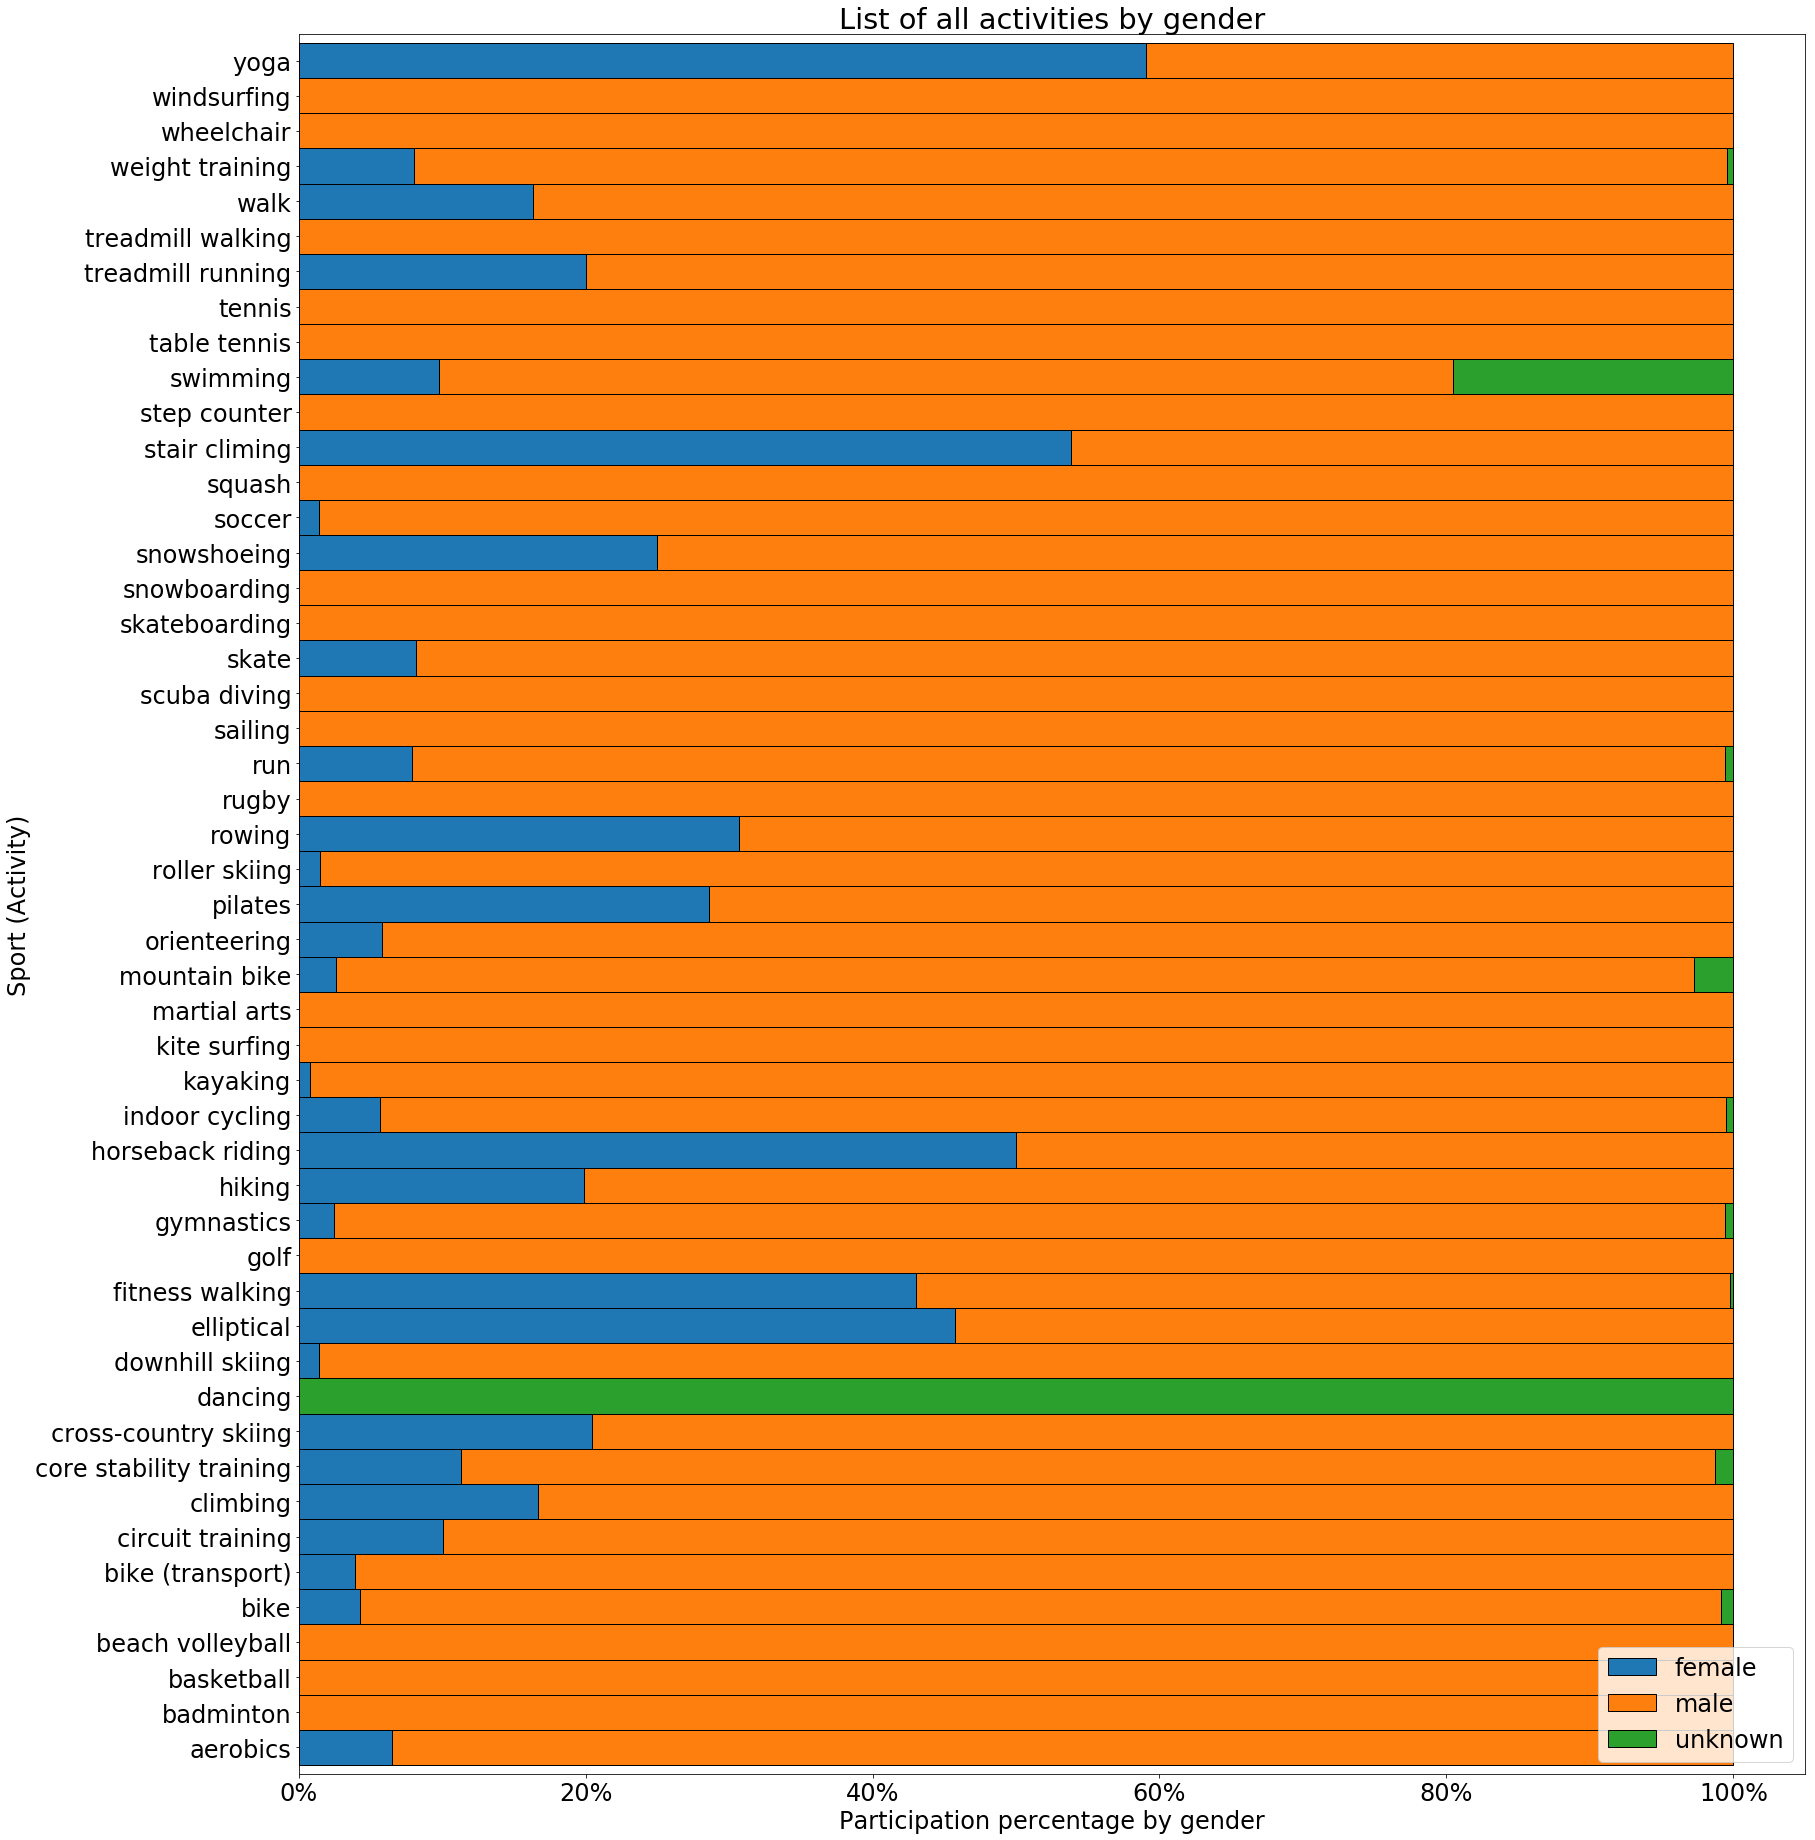

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
#userCount = df.select('userId').distinct().count()
activities = df.select('sport').distinct()
activityCount = activities.count()
#TO DO: average workouts by user
count = DataFrame([[activityCount]] ,columns= ['Sport (Activity) types'])
print('Activity count:')
count
print('\nList of all activities:')
#activities.toPandas()
activities_by_gender = df.groupBy('sport', 'gender').count().toPandas()
activities_by_gender_sum = activities_by_gender.set_index(['sport','gender']).unstack(level='gender', fill_value=0).reset_index()
#activities_by_gender_sum = activities_by_gender_sum.astype(int)
activities_by_gender_sum
fig = plt.figure(figsize=(27, 32))
grid_size = (1,1)

ax = plt.subplot2grid(grid_size, (0,0), colspan=1, rowspan=1)


# source1: http://queirozf.com/entries/pandas-dataframe-plot-examples-with-matplotlib-pyplot#stacked-bar-plot-with-group-by
# source2: https://towardsdatascience.com/a-guide-to-pandas-and-matplotlib-for-data-exploration-56fad95f951c
plot = activities_by_gender.groupby(['sport', 'gender']).agg(np.mean).groupby(level=0).apply(
    lambda x: 100 * x / x.sum()).unstack().plot(kind='barh', stacked=True, width=1
                , edgecolor='black', ax=ax, title='List of all activities by gender')
a= plt.ylabel('Sport (Activity)')
b= plt.xlabel('Participation percentage by gender')
c= plt.legend(sorted(activities_by_gender['gender'].unique()), loc='lower right')
plt.rcParams.update({'font.size': 24})
#plt.axes.xaxis.labelpad = 10
ax = plt.gca()
f = ax.xaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

In [7]:
df = df.withColumn('PerWorkoutRecordCount', size(col('timestamp')))

df.select('userId', 'id', 'sport','PerWorkoutRecordCount')\
   .distinct().orderBy(['userId', 'id']).limit(20).toPandas()


,userId,id,sport,PerWorkoutRecordCount
0,69,20253450,bike,499
1,69,20253456,run,500
2,69,24888428,run,499
3,69,24888434,run,500
4,69,27730553,run,499
5,69,28639037,run,276
6,69,30369221,run,500
7,69,32334585,run,499
8,69,32946380,run,95
9,69,34543589,run,25
